# SSSFDM_VLF_uniandes

changed: only data from C. Avila.


Program to obtain the result figures of [arXiv:1709.09796](https://inspirehep.net/search?p=find+eprint+1709.09796)

Check pyroot folder to obtain the efficiency for a specfic point with fix $M_{H^\pm}$,  $\lambda_L$ and  $M_{H^0}$.  


--- modify!
input MF, MS or DeltaM

Now Eff not in % but abs.value



## Initialization

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The number of background events after the cuts is given by `NB` for a luminosity of $\mathcal{L}=100\ \text{fb}^{-1}$.

(check numbers!)

In [3]:
import numpy as np
import scipy.optimize as optimization
import scipy.ndimage
import pandas as pd
from curvefit import *
import sys
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# change vars:
# Eff now NS/NS_orig, with NS_orig=100k.

##Zvv=500. ## whats this?
###NB=Zvv/0.7 #Background to 30fb^-1 (why? whats 0.7)
#set NB further below

########## warning: need bkg for 30/fb.
# NB30=NB100*0.3

def func(x, a, b, c, d, e):
    return a + b*x + c*x*x + d*x*x*x + e*x*x*x*x

def Z(S,B):
    return S/np.sqrt(S+B)

def significance(XS,Eff,Lumi,NB):
    '''XS: Cross section in pb 
       Eff: Cut efficiency in % ---> now Eff, not Eff/100
       Lumi in pb^-1
       TB: SM Backound at 30000 pb^-1
       NB: SM bkg for 100/fb=100000/pb
    '''
    LumiNorm=1.0E5
    Evts=Lumi*(XS.transpose())*(Eff)
    return Z(Evts,NB*Lumi/LumiNorm) #

def g(x,excl=5):
    return excl*np.ones_like(x)

In [4]:
# By Jake VanderPlas
# License: BSD-style

import matplotlib.pyplot as plt
import numpy as np


def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)



# Full dataframe

Intersection of two graphs in Python: https://stackoverflow.com/a/28766902/2268280. See also: https://stackoverflow.com/a/31541338/2268280

## Data...

Replace to MF,MS

grid of $m==mF=11$ values of $M_F$, and $l==lFS=10$ values of deltaM.  

therefore XS=
  ( [XS(MF1,DeltaM1), XS(MF1,DeltaM2)],
    [XS(MF2,DeltaM1), XS(MF2,DeltaM2)] ) =
  [ [A, A], 
    [B, B]]

Orig:
* We require a $l\times m$ matrix of cross sections for each $l$ and $m$ values denoted as: `XS`

change: XST is $m\times l$


* We require a $m\times l$ matrix of cut efficiences (in %) for each $m$ and $l$ values denoted as : `Eff`

In [5]:
# prod cross sections in fb.
XSfb50=5135.7
XSfb60=1816.8
XSfb70=1032.2
XSfb80=668.4
XSfb90=461.6

XSfb100=331.5
XSfb105=284.8
XSfb110=246.5
XSfb115=214.2
XSfb120=187.3
XSfb125=164.6
XSfb130=145.3
XSfb135=128.9
XSfb140=114.5
XSfb145=102.2
XSfb150=91.5

XSfb155=82.3
XSfb160=74.2
XSfb165=67.0
XSfb170=60.7
XSfb175=55.1
XSfb180=50.1
XSfb185=45.8
XSfb190=41.8
XSfb195=38.3
XSfb200=35.1


In [6]:
# prod cross sections in pb.
XS100=XSfb100/1E3
XS105=XSfb105/1E3
XS110=XSfb110/1E3
XS115=XSfb115/1E3
XS120=XSfb120/1E3
XS125=XSfb125/1E3
XS130=XSfb130/1E3
XS135=XSfb135/1E3
XS140=XSfb140/1E3
XS145=XSfb145/1E3
XS150=XSfb150/1E3

XS155=XSfb155/1E3
XS160=XSfb160/1E3
XS165=XSfb165/1E3
XS170=XSfb170/1E3
XS175=XSfb175/1E3
XS180=XSfb180/1E3
XS185=XSfb185/1E3
XS190=XSfb190/1E3
XS195=XSfb195/1E3
XS200=XSfb200/1E3


In [7]:
#from significance.sh:
#double xs_wjets=3092000.0; //fb
#double xs_top=288000.2; //fb
#double xs_wz=22820.0; //fb

#in pb!
XSWj=3092.0
XSt=288.0
XSWZ=22.82


In [8]:
#generated events (NumberGeneratedSignal, etc):
NGS=1E5
NGWj=4031959
NGWZ=45693
Nt=255207

#generated Lumi (effectiveLuminosity_for_Generated...):
LGS100=NGS/XS100
#etc.
LGWj=NGWj/XSWj
LGWZ=NGWZ/XSWZ
LGt=Nt/XSt

#for 100/fb=1E5/pb: [here in pb] 
Lumi=1E5
k100Sx=Lumi/LGS100
k100Wj=Lumi/LGWj
k100WZ=Lumi/LGWZ
k100t=Lumi/LGt

#scalingfactor k [Signal MF100,MS90]
#scaling[L=100/fb]: realXS/nominalXS[n of generated events/L[pb]] 


In [9]:
#scenario 2040:
NWj=6486
NWZ=983
Nt=202

NSx=2598  #number of events for XS100 and DeltaM=10, SR2040, here as test
NB100=NWj*k100Wj + NWZ*k100WZ + Nt*k100t
NB2040=NB100 #for 100/fb

NS100x=NSx*k100Sx  #number of events for XS100 and DeltaM=10, SR2040
NWj*k100Wj , NWZ*k100WZ , Nt*k100t

(497393.7482995239, 49092.99017354956, 22795.61297299839)

In [10]:
#scenario 1530:
#NWj=
#NWZ=
#Nt=

#NSx=  #number of events for XS100 and DeltaM=10, SR1530

#NB100=NWj*k100Wj + NWZ*k100WZ + Nt*k100t
#NB2040=NB100 #for 100/fb
#NS100x=NSx*k100Sx  #number of events for XS100 and DeltaM=10
#NWj*k100Wj , NWZ*k100WZ , Nt*k100t

In [11]:
#somehow S eval in progs is a bit lower.... check. for this example, 1.17859 instead of 1.1405926,
# -> factor 1.03332 , below, a factor 1.03 - almost effect of neglecting WZ, or twice... singletop.
NB100,NS100x, NS100x/np.sqrt(NS100x+NB100)

(569282.3514460719, 861.2370000000001, 1.1405926195586777)

In [12]:
#scenario 1020:
NWj=911
NWZ=126
Nt=25

NB100=NWj*k100Wj + NWZ*k100WZ + Nt*k100t
NB1020=NB100

NS100x=521*k100Sx  #number of events for XS100 and DeltaM=10

In [13]:
#test!
#somehow S eval in progs is a bit lower.... check. for this example, 1.17859 instead of 1.1405926,
# -> factor 1.03332 
NB100,NS100x, NS100x/np.sqrt(NS100x+NB100)

(78976.05089794498, 172.7115, 0.61390220294255415)

In [41]:
#chose scenario 2040. Need number of bkg for L=30/fb:
L30=3E4
L100=1E5
rescale30=L30/Lumi
rescale100=L100/Lumi
NB30=NB2040*rescale30
NB100=NB2040*rescale100

In [14]:
deltaM=np.array([1,2,3,4,5,6,7,8,9,10]) #l=lFS=10
MF=np.array([100,105,110,115,120,125,130,135,140,145,150])   #m=mF=11
XSF=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150])
XS=np.array([XSF,XSF,XSF,XSF,XSF,XSF,XSF,XSF,XSF,XSF])
XST=XS.transpose()

MF100_170=np.array([100,105,110,115,120,125,130,135,140,145,150,155,160,165,170])   #m=mF=11
MH0170=MF100_170
XSFt=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150,XS155,XS160,XS165,XS170])
XS170=np.array([XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt])


In [67]:
#old scenarios (oscen)
scen=110.1530
oscen=0

#if scen==2040170:  

#if scen==110.2020:        
#if scen==150.2020:        

if scen==110.1030:        
    nsignallist=[ [  240 ,  331 ,  358 ,  544 ,  725 ,  1004 ,  1343 ,  1806 ,  2037 ,  929  ], [  252 ,  339 ,  404 ,  572 ,  790 ,  1012 ,  1429 ,  1964 ,  2002 ,  940  ], [  300 ,  335 ,  439 ,  567 ,  859 ,  1088 ,  1460 ,  1566 ,  2127 ,  865  ], [  273 ,  363 ,  484 ,  607 ,  852 ,  1120 ,  1653 ,  1986 ,  2317 ,  960  ], [  333 ,  396 ,  503 ,  665 ,  854 ,  1226 ,  1649 ,  2254 ,  2269 ,  915  ], [  316 ,  403 ,  542 ,  702 ,  935 ,  1304 ,  1697 ,  2198 ,  2296 ,  883  ], [  322 ,  408 ,  556 ,  756 ,  997 ,  1351 ,  1810 ,  2397 ,  2421 ,  871  ], [  372 ,  433 ,  525 ,  708 ,  1043 ,  1366 ,  1876 ,  2346 ,  2374 ,  879  ], [  349 ,  478 ,  579 ,  748 ,  985 ,  1396 ,  1993 ,  2495 ,  2477 ,  868  ], [  368 ,  463 ,  573 ,  818 ,  1113 ,  1485 ,  2060 ,  2403 ,  2509 ,  865  ], [  368 ,  537 ,  589 ,  760 ,  1163 ,  1522 ,  1957 ,  2501 ,  2447 ,  827  ], [  390 ,  491 ,  645 ,  837 ,  1137 ,  1535 ,  2051 ,  2599 ,  2505 ,  832  ], [  438 ,  509 ,  672 ,  899 ,  1168 ,  1575 ,  2154 ,  2660 ,  2500 ,  772  ], [  383 ,  520 ,  709 ,  872 ,  1163 ,  1660 ,  2206 ,  2744 ,  2572 ,  736  ], [  426 ,  510 ,  700 ,  963 ,  1196 ,  1683 ,  2232 ,  2694 ,  2569 ,  764  ]  ]
    Signiflist=[ [ 0.374954, 0.516951, 0.559064, 0.848946, 1.13066, 1.56416, 2.08971, 2.8054, 3.16157, 1.44772 ], [ 0.338268, 0.454926, 0.542043, 0.767039, 1.05864, 1.35519, 1.91109, 2.62218, 2.6726, 1.25906 ], [ 0.348537, 0.389162, 0.509831, 0.658253, 0.996453, 1.26131, 1.69085, 1.81309, 2.45886, 1.0034 ], [ 0.275656, 0.366453, 0.488463, 0.612418, 0.859105, 1.12862, 1.66363, 1.99719, 2.32824, 0.967758 ], [ 0.294001, 0.349576, 0.443934, 0.586713, 0.753167, 1.08041, 1.45191, 1.98211, 1.99524, 0.806863 ], [ 0.245207, 0.312667, 0.420403, 0.544348, 0.724714, 1.01004, 1.31351, 1.69974, 1.77521, 0.684474 ], [ 0.220578, 0.279452, 0.38073, 0.517517, 0.682227, 0.923936, 1.23693, 1.63653, 1.65285, 0.596129 ], [ 0.226064, 0.263111, 0.318972, 0.430044, 0.633222, 0.828937, 1.1376, 1.42165, 1.43856, 0.53378 ], [ 0.188411, 0.25801, 0.312486, 0.403609, 0.53133, 0.75264, 1.07369, 1.34328, 1.33362, 0.468288 ], [ 0.177331, 0.223085, 0.276051, 0.393974, 0.535876, 0.714682, 0.990765, 1.15528, 1.2061, 0.416589 ], [ 0.158772, 0.231646, 0.254064, 0.327768, 0.501366, 0.65589, 0.842977, 1.07671, 1.05352, 0.356639 ], [ 0.151348, 0.190526, 0.250248, 0.324683, 0.440936, 0.595067, 0.794728, 1.00657, 0.970244, 0.322745 ], [ 0.153246, 0.178076, 0.235071, 0.314419, 0.408409, 0.550539, 0.752568, 0.928969, 0.873206, 0.27003 ], [ 0.121009, 0.164277, 0.223954, 0.275408, 0.367236, 0.523978, 0.696041, 0.865445, 0.811301, 0.232478 ], [ 0.121938, 0.145974, 0.200331, 0.27555, 0.342166, 0.481335, 0.638111, 0.769954, 0.73429, 0.218638 ]  ]

if scen==110.2040:        
    nsignallist=[ [  240 ,  331 ,  358 ,  544 ,  725 ,  1004 ,  1343 ,  1806 ,  2037 ,  929  ], [  252 ,  339 ,  404 ,  572 ,  790 ,  1012 ,  1429 ,  1964 ,  2002 ,  940  ], [  300 ,  335 ,  439 ,  567 ,  859 ,  1088 ,  1460 ,  1566 ,  2127 ,  865  ], [  273 ,  363 ,  484 ,  607 ,  852 ,  1120 ,  1653 ,  1986 ,  2317 ,  960  ], [  333 ,  396 ,  503 ,  665 ,  854 ,  1226 ,  1649 ,  2254 ,  2269 ,  915  ], [  316 ,  403 ,  542 ,  702 ,  935 ,  1304 ,  1697 ,  2198 ,  2296 ,  883  ], [  322 ,  408 ,  556 ,  756 ,  997 ,  1351 ,  1810 ,  2397 ,  2421 ,  871  ], [  372 ,  433 ,  525 ,  708 ,  1043 ,  1366 ,  1876 ,  2346 ,  2374 ,  879  ], [  349 ,  478 ,  579 ,  748 ,  985 ,  1396 ,  1993 ,  2495 ,  2477 ,  868  ], [  368 ,  463 ,  573 ,  818 ,  1113 ,  1485 ,  2060 ,  2403 ,  2509 ,  865  ], [  368 ,  537 ,  589 ,  760 ,  1163 ,  1522 ,  1957 ,  2501 ,  2447 ,  827  ], [  390 ,  491 ,  645 ,  837 ,  1137 ,  1535 ,  2051 ,  2599 ,  2505 ,  832  ], [  438 ,  509 ,  672 ,  899 ,  1168 ,  1575 ,  2154 ,  2660 ,  2500 ,  772  ], [  383 ,  520 ,  709 ,  872 ,  1163 ,  1660 ,  2206 ,  2744 ,  2572 ,  736  ], [  426 ,  510 ,  700 ,  963 ,  1196 ,  1683 ,  2232 ,  2694 ,  2569 ,  764  ]  ]
    Signiflist=[ [ 0.604626, 0.709302, 0.86522, 0.982475, 1.20778, 1.3993, 1.61739, 1.73166, 1.64824, 0.696658 ], [ 0.558737, 0.631777, 0.769376, 0.922014, 1.10174, 1.27838, 1.4411, 1.60015, 1.4182, 0.598579 ], [ 0.534847, 0.575602, 0.689489, 0.810138, 1.00645, 1.13224, 1.2799, 1.32633, 1.28929, 0.488863 ], [ 0.461619, 0.529734, 0.63688, 0.731748, 0.890574, 1.02576, 1.18902, 1.23708, 1.21714, 0.467977 ], [ 0.450136, 0.504934, 0.593073, 0.682386, 0.787952, 0.962918, 1.07318, 1.18223, 1.02916, 0.390964 ], [ 0.390369, 0.450746, 0.525072, 0.63497, 0.746935, 0.86515, 0.966602, 1.03388, 0.923026, 0.328937 ], [ 0.363101, 0.416094, 0.497112, 0.58674, 0.687436, 0.768715, 0.891224, 0.964468, 0.856445, 0.288223 ], [ 0.323772, 0.384454, 0.444036, 0.512081, 0.612354, 0.721346, 0.812836, 0.852704, 0.751116, 0.262261 ], [ 0.295141, 0.348805, 0.415816, 0.482575, 0.549809, 0.643728, 0.753154, 0.795122, 0.694441, 0.226655 ], [ 0.272549, 0.3172, 0.379834, 0.432709, 0.526742, 0.612526, 0.692663, 0.690281, 0.630287, 0.202096 ], [ 0.245768, 0.301077, 0.338917, 0.38723, 0.486558, 0.548046, 0.597502, 0.64637, 0.547658, 0.17473 ], [ 0.241662, 0.28216, 0.326494, 0.372219, 0.428062, 0.502392, 0.556126, 0.592584, 0.505881, 0.159434 ], [ 0.223392, 0.247944, 0.301294, 0.344725, 0.402941, 0.464454, 0.517779, 0.550181, 0.452498, 0.131623 ], [ 0.189497, 0.231423, 0.27093, 0.312991, 0.363999, 0.42935, 0.478641, 0.510031, 0.417701, 0.113593 ], [ 0.180051, 0.212757, 0.254473, 0.295799, 0.339439, 0.392212, 0.43417, 0.449871, 0.382044, 0.107163 ]  ]

if scen==150.2040:        
    nsignallist=[ [  542 ,  641 ,  802 ,  933 ,  1174 ,  1369 ,  1693 ,  1882 ,  1872 ,  876  ], [  575 ,  670 ,  827 ,  995 ,  1235 ,  1544 ,  1714 ,  1983 ,  1858 ,  879  ], [  658 ,  719 ,  849 ,  1042 ,  1323 ,  1553 ,  1768 ,  1845 ,  1952 ,  844  ], [  660 ,  727 ,  956 ,  1146 ,  1332 ,  1652 ,  1912 ,  2089 ,  2139 ,  913  ], [  754 ,  866 ,  967 ,  1190 ,  1449 ,  1735 ,  1994 ,  2278 ,  2112 ,  892  ], [  760 ,  889 ,  1019 ,  1257 ,  1511 ,  1806 ,  2100 ,  2279 ,  2131 ,  862  ], [  798 ,  929 ,  1137 ,  1317 ,  1652 ,  1865 ,  2238 ,  2430 ,  2265 ,  849  ], [  804 ,  962 ,  1092 ,  1337 ,  1640 ,  2002 ,  2230 ,  2446 ,  2261 ,  873  ], [  835 ,  1004 ,  1219 ,  1467 ,  1666 ,  2021 ,  2441 ,  2555 ,  2382 ,  835  ], [  871 ,  1023 ,  1247 ,  1453 ,  1772 ,  2153 ,  2515 ,  2494 ,  2450 ,  856  ], [  904 ,  1099 ,  1265 ,  1409 ,  1831 ,  2151 ,  2396 ,  2635 ,  2337 ,  834  ], [  984 ,  1131 ,  1330 ,  1573 ,  1839 ,  2230 ,  2495 ,  2722 ,  2420 ,  836  ], [  1018 ,  1144 ,  1386 ,  1605 ,  1881 ,  2262 ,  2564 ,  2813 ,  2408 ,  763  ], [  949 ,  1155 ,  1374 ,  1674 ,  1924 ,  2331 ,  2655 ,  2891 ,  2486 ,  745  ], [  992 ,  1161 ,  1437 ,  1701 ,  1983 ,  2250 ,  2643 ,  2792 ,  2509 ,  765  ]  ]
    Signiflist=[ [ 0.542412, 0.641391, 0.802295, 0.933158, 1.17377, 1.36833, 1.69135, 1.87963, 1.86967, 0.876224 ], [ 0.494408, 0.576022, 0.710856, 0.855075, 1.06099, 1.32593, 1.47159, 1.70196, 1.59493, 0.755502 ], [ 0.489693, 0.535053, 0.631702, 0.775137, 0.983861, 1.1546, 1.31413, 1.37125, 1.4506, 0.627986 ], [ 0.42686, 0.470162, 0.618122, 0.740833, 0.860917, 1.06741, 1.23509, 1.3492, 1.38142, 0.590344 ], [ 0.426414, 0.489707, 0.546774, 0.672738, 0.818976, 0.980384, 1.12649, 1.28662, 1.19303, 0.504399 ], [ 0.377744, 0.441819, 0.506377, 0.624536, 0.750592, 0.896936, 1.04272, 1.13145, 1.05809, 0.428409 ], [ 0.35014, 0.407583, 0.498771, 0.577663, 0.724441, 0.817731, 0.981035, 1.06506, 0.992853, 0.372504 ], [ 0.312972, 0.374442, 0.42501, 0.52029, 0.638088, 0.778769, 0.867343, 0.951235, 0.879385, 0.339818 ], [ 0.288739, 0.347147, 0.421439, 0.507114, 0.575844, 0.698419, 0.843378, 0.882713, 0.823019, 0.288739 ], [ 0.268841, 0.315734, 0.384829, 0.448358, 0.546712, 0.664143, 0.77568, 0.76921, 0.755655, 0.264213 ], [ 0.24982, 0.303684, 0.34953, 0.389295, 0.505801, 0.59412, 0.661723, 0.727657, 0.645444, 0.230483 ], [ 0.244589, 0.281113, 0.33055, 0.390908, 0.456966, 0.554043, 0.619821, 0.676156, 0.601206, 0.207813 ], [ 0.228142, 0.256368, 0.310574, 0.359621, 0.421423, 0.506718, 0.574311, 0.630032, 0.539397, 0.171009 ], [ 0.192051, 0.233725, 0.278023, 0.338696, 0.389248, 0.471531, 0.537019, 0.584712, 0.502861, 0.150777 ], [ 0.181879, 0.212855, 0.263436, 0.311811, 0.363476, 0.412385, 0.484362, 0.511647, 0.459822, 0.140269 ]  ]

if scen==110.1530:
    nsignallist=[ [  443 ,  583 ,  674 ,  878 ,  1104 ,  1444 ,  1811 ,  2113 ,  2175 ,  932  ], [  518 ,  594 ,  734 ,  938 ,  1198 ,  1499 ,  1875 ,  2293 ,  2120 ,  948  ], [  557 ,  627 ,  783 ,  941 ,  1280 ,  1571 ,  1906 ,  2010 ,  2244 ,  871  ], [  546 ,  656 ,  801 ,  997 ,  1295 ,  1601 ,  2050 ,  2312 ,  2452 ,  965  ], [  635 ,  724 ,  898 ,  1056 ,  1287 ,  1737 ,  2090 ,  2556 ,  2365 ,  919  ], [  596 ,  710 ,  896 ,  1142 ,  1432 ,  1785 ,  2132 ,  2504 ,  2400 ,  892  ], [  621 ,  749 ,  959 ,  1193 ,  1517 ,  1793 ,  2246 ,  2684 ,  2517 ,  877  ], [  678 ,  782 ,  952 ,  1156 ,  1486 ,  1908 ,  2324 ,  2624 ,  2477 ,  885  ], [  641 ,  841 ,  1022 ,  1222 ,  1487 ,  1906 ,  2452 ,  2778 ,  2570 ,  871  ], [  692 ,  839 ,  1016 ,  1271 ,  1638 ,  2008 ,  2526 ,  2676 ,  2603 ,  873  ], [  710 ,  927 ,  1049 ,  1260 ,  1702 ,  2050 ,  2369 ,  2810 ,  2526 ,  829  ], [  745 ,  883 ,  1099 ,  1315 ,  1663 ,  2079 ,  2504 ,  2871 ,  2590 ,  836  ], [  800 ,  915 ,  1114 ,  1416 ,  1730 ,  2112 ,  2573 ,  2897 ,  2570 ,  776  ], [  702 ,  956 ,  1162 ,  1370 ,  1741 ,  2209 ,  2628 ,  2982 ,  2638 ,  737  ], [  794 ,  957 ,  1192 ,  1505 ,  1779 ,  2210 ,  2648 ,  2919 ,  2632 ,  766  ]  ]
    Signiflist=[ [ 0.466496, 0.613778, 0.709474, 0.923896, 1.16127, 1.51805, 1.9027, 2.21888, 2.28375, 0.98063 ], [ 0.468629, 0.537326, 0.663835, 0.848086, 1.08276, 1.35422, 1.69299, 2.06918, 1.91354, 0.857115 ], [ 0.436168, 0.49094, 0.612969, 0.736514, 1.00142, 1.22865, 1.49003, 1.57113, 1.75353, 0.681784 ], [ 0.371568, 0.446373, 0.544952, 0.678155, 0.88057, 1.08828, 1.39282, 1.57038, 1.66523, 0.656412 ], [ 0.377862, 0.430786, 0.53423, 0.628132, 0.765369, 1.03254, 1.24197, 1.51821, 1.40502, 0.546712 ], [ 0.311705, 0.371291, 0.468487, 0.596989, 0.748409, 0.932625, 1.1136, 1.30751, 1.25331, 0.466397 ], [ 0.286709, 0.345773, 0.442651, 0.550565, 0.699924, 0.827099, 1.03572, 1.2373, 1.16046, 0.404826 ], [ 0.277699, 0.320274, 0.389855, 0.473333, 0.608323, 0.780863, 0.950857, 1.07339, 1.01336, 0.362434 ], [ 0.23323, 0.305966, 0.371777, 0.44448, 0.540786, 0.692999, 0.891237, 1.00954, 0.934064, 0.316875 ], [ 0.224742, 0.272463, 0.329913, 0.412662, 0.531717, 0.651699, 0.819598, 0.868201, 0.844549, 0.283499 ], [ 0.206452, 0.269524, 0.304978, 0.366287, 0.494677, 0.595726, 0.688325, 0.816294, 0.733889, 0.241042 ], [ 0.194852, 0.230932, 0.287397, 0.343851, 0.434785, 0.543453, 0.654433, 0.750236, 0.676885, 0.218644 ], [ 0.188645, 0.215754, 0.262658, 0.333825, 0.407804, 0.497779, 0.606328, 0.682596, 0.605622, 0.182988 ], [ 0.149483, 0.203552, 0.247396, 0.29166, 0.370596, 0.470142, 0.559238, 0.634493, 0.561364, 0.156934 ], [ 0.153174, 0.18461, 0.229926, 0.290274, 0.343092, 0.426157, 0.510548, 0.562752, 0.507466, 0.147774 ]  ]

if scen==150.1530:
    nsignallist=[ [  273 ,  377 ,  435 ,  579 ,  726 ,  958 ,  1319 ,  1596 ,  1735 ,  823  ], [  325 ,  369 ,  465 ,  596 ,  784 ,  1070 ,  1333 ,  1697 ,  1676 ,  839  ], [  359 ,  411 ,  480 ,  610 ,  871 ,  1102 ,  1345 ,  1425 ,  1768 ,  786  ], [  343 ,  404 ,  528 ,  685 ,  847 ,  1153 ,  1472 ,  1749 ,  1955 ,  853  ], [  424 ,  487 ,  562 ,  711 ,  933 ,  1218 ,  1514 ,  1932 ,  1924 ,  835  ], [  402 ,  479 ,  591 ,  768 ,  965 ,  1274 ,  1588 ,  1913 ,  1929 ,  818  ], [  425 ,  509 ,  655 ,  807 ,  1090 ,  1306 ,  1722 ,  2087 ,  2055 ,  796  ], [  445 ,  536 ,  632 ,  792 ,  1073 ,  1423 ,  1713 ,  2044 ,  2042 ,  810  ], [  428 ,  574 ,  719 ,  882 ,  1065 ,  1432 ,  1912 ,  2175 ,  2147 ,  781  ], [  466 ,  571 ,  711 ,  909 ,  1166 ,  1522 ,  1969 ,  2089 ,  2196 ,  802  ], [  502 ,  651 ,  753 ,  870 ,  1229 ,  1535 ,  1817 ,  2209 ,  2095 ,  769  ], [  535 ,  600 ,  777 ,  958 ,  1232 ,  1585 ,  1943 ,  2298 ,  2172 ,  767  ], [  568 ,  652 ,  803 ,  1012 ,  1240 ,  1614 ,  1991 ,  2313 ,  2159 ,  710  ], [  491 ,  671 ,  821 ,  1017 ,  1281 ,  1678 ,  2050 ,  2404 ,  2234 ,  691  ], [  558 ,  667 ,  861 ,  1094 ,  1319 ,  1626 ,  2071 ,  2329 ,  2227 ,  708  ]  ]
    Signiflist=[ [ 0.410046, 0.566053, 0.65301, 0.868753, 1.08877, 1.43557, 1.97412, 2.38647, 2.5931, 1.23384 ], [ 0.419373, 0.476088, 0.59978, 0.768457, 1.0103, 1.37771, 1.71503, 2.18104, 2.15418, 1.081 ], [ 0.400965, 0.458983, 0.535945, 0.680873, 0.971557, 1.22851, 1.49849, 1.5873, 1.96767, 0.876932 ], [ 0.332947, 0.392107, 0.512317, 0.664424, 0.821266, 1.11722, 1.42532, 1.69251, 1.89101, 0.827073 ], [ 0.359865, 0.413285, 0.476864, 0.603119, 0.791098, 1.03219, 1.2823, 1.63503, 1.62828, 0.708136 ], [ 0.299882, 0.357276, 0.440731, 0.572555, 0.719182, 0.948975, 1.18224, 1.42342, 1.43529, 0.609779 ], [ 0.279878, 0.335153, 0.431193, 0.531136, 0.717094, 0.85892, 1.13181, 1.37097, 1.35001, 0.523905 ], [ 0.259984, 0.313112, 0.369144, 0.462501, 0.626362, 0.830291, 0.999117, 1.19165, 1.19049, 0.473001 ], [ 0.222137, 0.297861, 0.373041, 0.457524, 0.552333, 0.742348, 0.990621, 1.12654, 1.11207, 0.405179 ], [ 0.215881, 0.264494, 0.329296, 0.420911, 0.539769, 0.704307, 0.91073, 0.966113, 1.01548, 0.371406 ], [ 0.208214, 0.269977, 0.312247, 0.360724, 0.509403, 0.636053, 0.752705, 0.914757, 0.867642, 0.318877 ], [ 0.199594, 0.223831, 0.289818, 0.357276, 0.459355, 0.590796, 0.724018, 0.856045, 0.809194, 0.28609 ], [ 0.191053, 0.219293, 0.27005, 0.340282, 0.416874, 0.542454, 0.668969, 0.77697, 0.725324, 0.23879 ], [ 0.149142, 0.203792, 0.249323, 0.308803, 0.388894, 0.509278, 0.622022, 0.729258, 0.677767, 0.209863 ], [ 0.153554, 0.183537, 0.236891, 0.300954, 0.362799, 0.447156, 0.569374, 0.640203, 0.612204, 0.194814 ]  ]    


Signif=fliplr(np.array(Signiflist))
SignifT=Signif.transpose()
nsignal=fliplr(np.array(nsignallist))

lumiscale=5.477
Z=lumiscale*SignifT

Nsevents=1.E5
Eff=nsignal/Nsevents

#test:
LumiS3=900/(SignifT**2)


In [19]:
## warning: need DeltaM -> 11-DeltaM ... clean up

LaL=deltaM
MH0=MF
#or: MH0=MF100_170

In [20]:
#### plots in the range MF=(100,150)
dh=pd.DataFrame()
#Significance=Signif
for i in range(LaL.shape[0]):
    for j in range(MH0.shape[0]):
        dh=dh.append({'LaL':LaL[i],'MH0':MH0[j],'XS':XS[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)
 

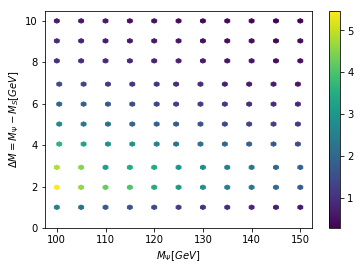

In [21]:
plt.hexbin(dh.MH0,dh.LaL,(1.732*dh.Significance),gridsize=50)
plt.ylim(0,10.5)
#plt.title("$p_T<15, MT<30$")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar()
ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

In [38]:
shape(Signif)[1]

10

In [39]:
MFi=100
MFf=150
DeltaMi=1
DeltaMf=10
lumiscale=1.732

xlist=np.linspace(MFi,MFf,shape(Signif)[0])
ylist=np.linspace(DeltaMi,DeltaMf,shape(Signif)[1])
X,Y = np.meshgrid(xlist,ylist)
Z=lumiscale*SignifT

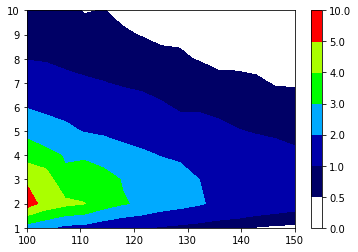

In [40]:
levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0,10.]
cp=plt.contourf(X,Y,Z,levels)
c=('#ffffff', '#000066', '#0000aa','#00aaff','#00ff00','#aaff00','#ff0000')
contour_filled = plt.contourf(X, Y, Z, levels, colors=c)
plt.colorbar(contour_filled)
#plt.clabel(cp,inline=True)

<a list of 6 text.Text objects>

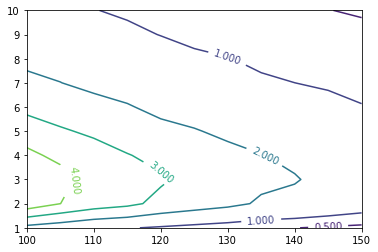

In [88]:
xlist=np.linspace(100,150,11)
ylist=np.linspace(1,10,10)
X,Y = np.meshgrid(xlist,ylist)
lumiscale=1.732
Z=lumiscale*SignifT

levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
cp=plt.contour(X,Y,Z,levels)
plt.clabel(cp,inline=True)
#print X,Z

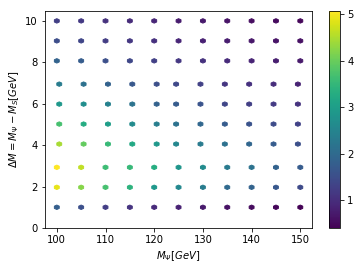

In [98]:
plt.hexbin(dh.MH0,dh.LaL,(1.82574*dh.Significance),gridsize=50)
plt.ylim(0,10.5)
#plt.title("$p_T<15, MT<30$")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar()
ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

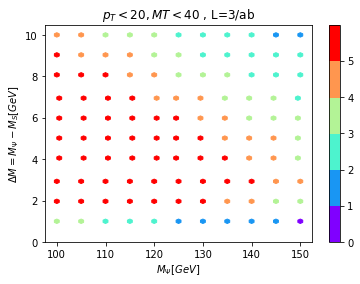

In [99]:
##### read again data (better do it above)

## (muonpt_max, mt_max, ljpt_min)
Signiflist=[ [ 0.869834, 0.960524, 1.17859, 1.35444, 1.60999, 1.85231, 2.07418, 2.15431, 1.94424, 0.702028 ], [ 0.780869, 0.883338, 1.08551, 1.22454, 1.45075, 1.6656, 1.81619, 1.97415, 1.71191, 0.592258 ], [ 0.714356, 0.785518, 0.94198, 1.08526, 1.32153, 1.49675, 1.65036, 1.66384, 1.49237, 0.491047 ], [ 0.639843, 0.735976, 0.868725, 0.987973, 1.17867, 1.33389, 1.48263, 1.51718, 1.36112, 0.43757 ], [ 0.593098, 0.668707, 0.779928, 0.887289, 1.01846, 1.19698, 1.34884, 1.40337, 1.16676, 0.383402 ], [ 0.515611, 0.584992, 0.707745, 0.809536, 0.941932, 1.07903, 1.19833, 1.22376, 1.04797, 0.323426 ], [ 0.482816, 0.540883, 0.652432, 0.748059, 0.861564, 0.973262, 1.08713, 1.12707, 0.953984, 0.279543 ], [ 0.428689, 0.496085, 0.579703, 0.656609, 0.750967, 0.875994, 0.990246, 0.997298, 0.812513, 0.24129 ], [ 0.392566, 0.443503, 0.5228, 0.606476, 0.698602, 0.798706, 0.89535, 0.932626, 0.76393, 0.213398 ], [ 0.350825, 0.406925, 0.484981, 0.559812, 0.650439, 0.746927, 0.804255, 0.809148, 0.682883, 0.18446 ], [ 0.317234, 0.38362, 0.4366, 0.496213, 0.580113, 0.663378, 0.714335, 0.754771, 0.59827, 0.160388 ] ] 
Signif=fliplr(np.array(Signiflist))
nsignallist=[ [  1917 ,  2117 ,  2598 ,  2986 ,  3550 ,  4085 ,  4575 ,  4752 ,  4288 ,  1547  ], [  2003 ,  2266 ,  2785 ,  3142 ,  3723 ,  4275 ,  4662 ,  5068 ,  4394 ,  1519  ], [  2117 ,  2328 ,  2792 ,  3217 ,  3918 ,  4438 ,  4894 ,  4934 ,  4425 ,  1455  ], [  2182 ,  2510 ,  2963 ,  3370 ,  4021 ,  4551 ,  5059 ,  5177 ,  4644 ,  1492  ], [  2313 ,  2608 ,  3042 ,  3461 ,  3973 ,  4670 ,  5263 ,  5476 ,  4552 ,  1495  ], [  2288 ,  2596 ,  3141 ,  3593 ,  4181 ,  4790 ,  5320 ,  5433 ,  4652 ,  1435  ], [  2427 ,  2719 ,  3280 ,  3761 ,  4332 ,  4894 ,  5467 ,  5668 ,  4797 ,  1405  ], [  2429 ,  2811 ,  3285 ,  3721 ,  4256 ,  4965 ,  5613 ,  5653 ,  4605 ,  1367  ], [  2504 ,  2829 ,  3335 ,  3869 ,  4457 ,  5096 ,  5713 ,  5951 ,  4874 ,  1361  ], [  2507 ,  2908 ,  3466 ,  4001 ,  4649 ,  5339 ,  5749 ,  5784 ,  4881 ,  1318  ], [  2532 ,  3062 ,  3485 ,  3961 ,  4631 ,  5296 ,  5703 ,  6026 ,  4776 ,  1280  ] ] 
nsignal=fliplr(np.array(nsignallist))
Nsevents=1.E5
Eff=nsignal/Nsevents

dh=pd.DataFrame()
#Significance=Signif
for i in range(LaL.shape[0]):
    for j in range(MH0.shape[0]):
        dh=dh.append({'LaL':LaL[i],'MH0':MH0[j],'XS':XS[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)

# ----------------------------------------------------------
        
N=6
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')
plt.hexbin(dh.MH0,dh.LaL,(5.477*dh.Significance),gridsize=50,cmap=cmap)
plt.ylim(0,10.5)
plt.title("$p_T<20, MT<40$ , L=3/ab")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar(ticks=range(N))
plt.clim(0., N )
#ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

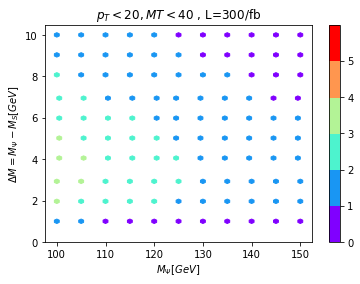

In [100]:
N=6
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')
plt.hexbin(dh.MH0,dh.LaL,(1.732*dh.Significance),gridsize=50,cmap=cmap)
plt.ylim(0,10.5)
plt.title("$p_T<20, MT<40$ , L=300/fb")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar(ticks=range(N))
plt.clim(0., N )
#ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

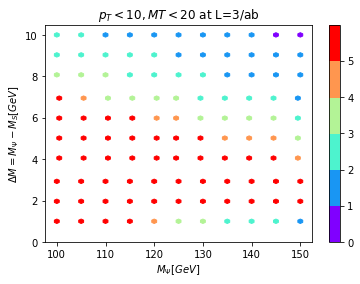

In [101]:
##### read again data (better do it above)

## .... (muonpt_max, mt_max, ljpt_min) =
Signiflist=[ [ 0.426421, 0.498034, 0.632711, 0.958815, 1.28211, 1.79472, 2.42329, 3.35564, 3.81283, 1.53733 ], [ 0.388295, 0.493624, 0.657272, 0.859351, 1.17363, 1.55714, 2.22001, 3.05382, 3.3078, 1.32856 ], [ 0.357779, 0.420974, 0.565365, 0.725008, 1.03861, 1.47417, 1.95841, 2.00598, 2.86082, 1.04942 ], [ 0.325049, 0.410565, 0.533693, 0.655197, 0.927015, 1.2752, 1.82748, 2.37553, 2.62385, 0.920751 ], [ 0.292484, 0.366585, 0.455754, 0.588082, 0.817619, 1.1578, 1.6526, 2.17853, 2.25076, 0.812824 ], [ 0.25645, 0.32761, 0.447574, 0.55363, 0.758393, 1.07066, 1.42161, 1.87526, 2.00593, 0.686141 ], [ 0.226393, 0.28549, 0.404179, 0.532921, 0.729642, 0.978795, 1.35608, 1.74766, 1.78525, 0.572809 ], [ 0.221634, 0.26934, 0.348202, 0.461024, 0.617198, 0.853414, 1.19676, 1.53075, 1.52981, 0.488396 ], [ 0.196884, 0.250173, 0.320231, 0.420881, 0.577653, 0.804688, 1.12732, 1.47798, 1.42451, 0.448553 ], [ 0.177239, 0.249151, 0.297081, 0.419491, 0.548579, 0.737799, 0.997854, 1.25654, 1.27259, 0.375325 ], [ 0.163719, 0.216034, 0.26197, 0.339071, 0.497226, 0.675712, 0.877162, 1.16001, 1.12492, 0.333037 ] ]
Signif=fliplr(np.array(Signiflist))
nsignallist=[ [  351 ,  410 ,  521 ,  790 ,  1057 ,  1481 ,  2002 ,  2777 ,  3158 ,  1268  ], [  372 ,  473 ,  630 ,  824 ,  1126 ,  1495 ,  2134 ,  2940 ,  3186 ,  1275  ], [  396 ,  466 ,  626 ,  803 ,  1151 ,  1635 ,  2174 ,  2227 ,  3181 ,  1163  ], [  414 ,  523 ,  680 ,  835 ,  1182 ,  1627 ,  2334 ,  3037 ,  3356 ,  1174  ], [  426 ,  534 ,  664 ,  857 ,  1192 ,  1689 ,  2413 ,  3184 ,  3290 ,  1185  ], [  425 ,  543 ,  742 ,  918 ,  1258 ,  1777 ,  2361 ,  3117 ,  3335 ,  1138  ], [  425 ,  536 ,  759 ,  1001 ,  1371 ,  1840 ,  2551 ,  3290 ,  3361 ,  1076  ], [  469 ,  570 ,  737 ,  976 ,  1307 ,  1808 ,  2537 ,  3247 ,  3245 ,  1034  ], [  469 ,  596 ,  763 ,  1003 ,  1377 ,  1919 ,  2690 ,  3529 ,  3401 ,  1069  ], [  473 ,  665 ,  793 ,  1120 ,  1465 ,  1971 ,  2667 ,  3360 ,  3403 ,  1002  ], [  488 ,  644 ,  781 ,  1011 ,  1483 ,  2016 ,  2618 ,  3464 ,  3359 ,  993  ] ]

nsignal=fliplr(np.array(nsignallist))
Nsevents=1.E5
Eff=nsignal/Nsevents

dh=pd.DataFrame()
#Significance=Signif
for i in range(LaL.shape[0]):
    for j in range(MH0.shape[0]):
        dh=dh.append({'LaL':LaL[i],'MH0':MH0[j],'XS':XS[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)


        #-------------------------------------------
        
N=6
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')
plt.hexbin(dh.MH0,dh.LaL,(5.477*dh.Significance),gridsize=50,cmap=cmap)
plt.ylim(0,10.5)
plt.title("$p_T<10, MT<20$ at L=3/ab ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar(ticks=range(N))
plt.clim(0., N )
#ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

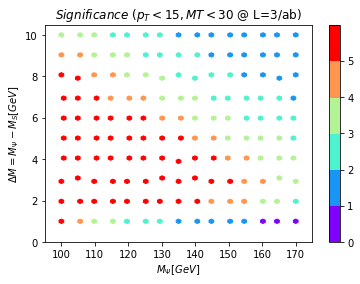

In [41]:
## .... (muonpt_max, mt_max, ljpt_min) =

#Signiflist=[ [ 0.426421, 0.498034, 0.632711, 0.958815, 1.28211, 1.79472, 2.42329, 3.35564, 3.81283, 1.53733 ], [ 0.388295, 0.493624, 0.657272, 0.859351, 1.17363, 1.55714, 2.22001, 3.05382, 3.3078, 1.32856 ], [ 0.357779, 0.420974, 0.565365, 0.725008, 1.03861, 1.47417, 1.95841, 2.00598, 2.86082, 1.04942 ], [ 0.325049, 0.410565, 0.533693, 0.655197, 0.927015, 1.2752, 1.82748, 2.37553, 2.62385, 0.920751 ], [ 0.292484, 0.366585, 0.455754, 0.588082, 0.817619, 1.1578, 1.6526, 2.17853, 2.25076, 0.812824 ], [ 0.25645, 0.32761, 0.447574, 0.55363, 0.758393, 1.07066, 1.42161, 1.87526, 2.00593, 0.686141 ], [ 0.226393, 0.28549, 0.404179, 0.532921, 0.729642, 0.978795, 1.35608, 1.74766, 1.78525, 0.572809 ], [ 0.221634, 0.26934, 0.348202, 0.461024, 0.617198, 0.853414, 1.19676, 1.53075, 1.52981, 0.488396 ], [ 0.196884, 0.250173, 0.320231, 0.420881, 0.577653, 0.804688, 1.12732, 1.47798, 1.42451, 0.448553 ], [ 0.177239, 0.249151, 0.297081, 0.419491, 0.548579, 0.737799, 0.997854, 1.25654, 1.27259, 0.375325 ], [ 0.163719, 0.216034, 0.26197, 0.339071, 0.497226, 0.675712, 0.877162, 1.16001, 1.12492, 0.333037 ] ]
signiflist=[ [ 0.693881, 0.824169, 1.02257, 1.28834, 1.589, 2.02551, 2.44146, 2.78041, 2.68225, 0.986138 ], [ 0.642021, 0.757449, 0.966774, 1.1621, 1.47725, 1.78987, 2.16534, 2.53705, 2.31221, 0.844437 ], [ 0.58586, 0.675236, 0.846911, 1.01501, 1.33651, 1.64376, 1.94581, 1.97786, 2.02443, 0.686783 ], [ 0.535317, 0.63786, 0.766554, 0.910913, 1.19732, 1.44524, 1.75746, 1.93677, 1.86366, 0.607318 ], [ 0.4956, 0.570011, 0.705067, 0.83551, 1.0109, 1.30512, 1.5805, 1.80093, 1.5805, 0.527655 ], [ 0.417785, 0.495262, 0.636769, 0.769856, 0.949483, 1.18431, 1.40094, 1.55792, 1.41935, 0.453674 ], [ 0.391321, 0.457054, 0.587013, 0.717233, 0.888539, 1.06156, 1.27945, 1.44081, 1.2827, 0.389248 ], [ 0.354524, 0.419409, 0.522105, 0.617427, 0.753944, 0.957861, 1.16799, 1.26187, 1.08956, 0.33088 ], [ 0.314698, 0.387741, 0.472671, 0.577881, 0.698226, 0.87356, 1.05722, 1.18607, 1.02273, 0.295327 ], [ 0.292568, 0.349436, 0.430456, 0.540405, 0.659281, 0.802893, 0.953121, 1.01636, 0.911719, 0.254236 ], [ 0.267541, 0.337853, 0.398646, 0.468753, 0.594772, 0.726162, 0.835534, 0.956802, 0.798831, 0.218857 ], [ 0.24568, 0.300874, 0.364952, 0.446966, 0.547075, 0.664764, 0.76684, 0.865543, 0.73751, 0.199373 ], [ 0.234363, 0.277774, 0.338724, 0.4163, 0.494317, 0.603157, 0.716808, 0.781783, 0.654696, 0.17098 ], [ 0.199607, 0.252466, 0.315426, 0.368136, 0.454974, 0.550122, 0.660127, 0.718122, 0.606629, 0.146058 ], [ 0.187648, 0.234425, 0.290848, 0.356172, 0.423219, 0.515734, 0.608109, 0.647798, 0.545786, 0.134059 ]  ]
Signif=fliplr(np.array(signiflist))
SignifT=Signif.transpose()

nsignallist=[ [  1027 ,  1220 ,  1514 ,  1908 ,  2354 ,  3002 ,  3620 ,  4124 ,  3978 ,  1460  ], [  1106 ,  1305 ,  1666 ,  2003 ,  2547 ,  3087 ,  3736 ,  4379 ,  3990 ,  1455  ], [  1166 ,  1344 ,  1686 ,  2021 ,  2662 ,  3275 ,  3878 ,  3942 ,  4035 ,  1367  ], [  1226 ,  1461 ,  1756 ,  2087 ,  2744 ,  3313 ,  4030 ,  4442 ,  4274 ,  1391  ], [  1298 ,  1493 ,  1847 ,  2189 ,  2649 ,  3421 ,  4144 ,  4723 ,  4144 ,  1382  ], [  1245 ,  1476 ,  1898 ,  2295 ,  2831 ,  3532 ,  4179 ,  4648 ,  4234 ,  1352  ], [  1321 ,  1543 ,  1982 ,  2422 ,  3001 ,  3586 ,  4323 ,  4869 ,  4334 ,  1314  ], [  1349 ,  1596 ,  1987 ,  2350 ,  2870 ,  3647 ,  4448 ,  4806 ,  4149 ,  1259  ], [  1348 ,  1661 ,  2025 ,  2476 ,  2992 ,  3744 ,  4532 ,  5085 ,  4384 ,  1265  ], [  1404 ,  1677 ,  2066 ,  2594 ,  3165 ,  3855 ,  4577 ,  4881 ,  4378 ,  1220  ], [  1434 ,  1811 ,  2137 ,  2513 ,  3189 ,  3894 ,  4481 ,  5132 ,  4284 ,  1173  ], [  1464 ,  1793 ,  2175 ,  2664 ,  3261 ,  3963 ,  4572 ,  5161 ,  4397 ,  1188  ], [  1549 ,  1836 ,  2239 ,  2752 ,  3268 ,  3988 ,  4740 ,  5170 ,  4329 ,  1130  ], [  1461 ,  1848 ,  2309 ,  2695 ,  3331 ,  4028 ,  4834 ,  5259 ,  4442 ,  1069  ], [  1516 ,  1894 ,  2350 ,  2878 ,  3420 ,  4168 ,  4915 ,  5236 ,  4411 ,  1083  ]  ]
#nsignallist=[ [  351 ,  410 ,  521 ,  790 ,  1057 ,  1481 ,  2002 ,  2777 ,  3158 ,  1268  ], [  372 ,  473 ,  630 ,  824 ,  1126 ,  1495 ,  2134 ,  2940 ,  3186 ,  1275  ], [  396 ,  466 ,  626 ,  803 ,  1151 ,  1635 ,  2174 ,  2227 ,  3181 ,  1163  ], [  414 ,  523 ,  680 ,  835 ,  1182 ,  1627 ,  2334 ,  3037 ,  3356 ,  1174  ], [  426 ,  534 ,  664 ,  857 ,  1192 ,  1689 ,  2413 ,  3184 ,  3290 ,  1185  ], [  425 ,  543 ,  742 ,  918 ,  1258 ,  1777 ,  2361 ,  3117 ,  3335 ,  1138  ], [  425 ,  536 ,  759 ,  1001 ,  1371 ,  1840 ,  2551 ,  3290 ,  3361 ,  1076  ], [  469 ,  570 ,  737 ,  976 ,  1307 ,  1808 ,  2537 ,  3247 ,  3245 ,  1034  ], [  469 ,  596 ,  763 ,  1003 ,  1377 ,  1919 ,  2690 ,  3529 ,  3401 ,  1069  ], [  473 ,  665 ,  793 ,  1120 ,  1465 ,  1971 ,  2667 ,  3360 ,  3403 ,  1002  ], [  488 ,  644 ,  781 ,  1011 ,  1483 ,  2016 ,  2618 ,  3464 ,  3359 ,  993  ] ]
nsignal=fliplr(np.array(nsignallist))

Nsevents=1.E5
Eff=nsignal/Nsevents

dh=pd.DataFrame()
#Significance=Signif
for i in range(LaL.shape[0]):
    for j in range(MH0170.shape[0]):
        dh=dh.append({'LaL':LaL[i],'MH0':MH0170[j],'XS':XS170[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)


        #-------------------------------------------
        
N=6
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')
plt.hexbin(dh.MH0,dh.LaL,(5.477*dh.Significance),gridsize=50,cmap=cmap)
plt.ylim(0,10.5)
plt.xlim(95,175)
plt.title("$Significance\ (p_T<15, MT<30$ @ L=3/ab) ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar(ticks=range(N))
plt.clim(0., N )
#ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
#plt.savefig('significance1530.pdf')

In [234]:
xlist=np.linspace(100,170,15)
ylist=np.linspace(1,10,10)
X,Y = np.meshgrid(xlist,ylist)
#lumiscale=1.732
lumiscale=5.477
Z=lumiscale*SignifT
X3=scipy.ndimage.zoom(X, 5)
Y3=scipy.ndimage.zoom(Y, 5)
Z3=scipy.ndimage.zoom(Z, 5)

In [148]:
shape(X3)

(100, 150)

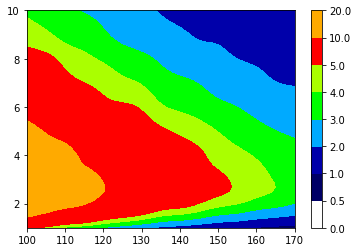

In [194]:
levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0,10.,20.]
cp=plt.contourf(X,Y,Z,levels)
c=('#ffffff', '#000066', '#0000aa','#00aaff','#00ff00','#aaff00','#ff0000','#ffaa00')
#contour_filled = plt.contourf(X, Y, Z, levels, colors=c)
contour_filled = plt.contourf(X3, Y3, Z3, levels, colors=c)
plt.colorbar(contour_filled)
#plt.clabel(cp,inline=True)

<a list of 8 text.Text objects>

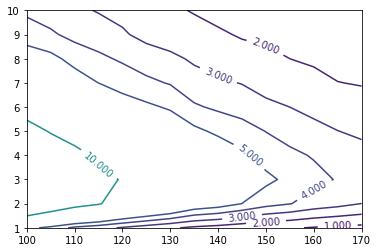

In [195]:
xlist=np.linspace(100,170,15)
ylist=np.linspace(1,10,10)
X,Y = np.meshgrid(xlist,ylist)
#lumiscale=1.732
lumiscale=5.477
Z=lumiscale*SignifT
levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0,10.,20.]
#levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
cp=plt.contour(X,Y,Z,levels)
plt.clabel(cp,inline=True)
#print X,Z

<a list of 8 text.Text objects>

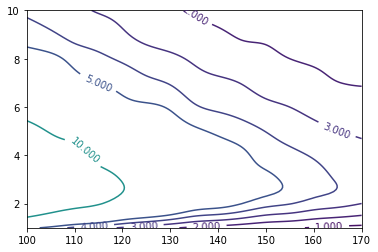

In [196]:
import scipy.ndimage

xlist=np.linspace(100,170,15)
ylist=np.linspace(1,10,10)
X,Y = np.meshgrid(xlist,ylist)
#lumiscale=1.732
lumiscale=5.477
Z=lumiscale*SignifT

#------------from JoeKington-------
#data = np.loadtxt('data.txt')
# Resample your data grid by a factor of 3 using cubic spline interpolation.
#data = scipy.ndimage.zoom(data, 3)
#plt.contour(data)
#----------------------------------
X3=scipy.ndimage.zoom(X, 10)
Y3=scipy.ndimage.zoom(Y, 10)
Z3=scipy.ndimage.zoom(Z, 10)

levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0,10.,20.]
#levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
#cp=plt.contour(X,Y,Z,levels)
cp=plt.contour(X3,Y3,Z3,levels)
plt.clabel(cp,inline=True)


In [188]:
l30,l300,l1000,l3000=np.sqrt(0.3),np.sqrt(3.),np.sqrt(10.),np.sqrt(30.)
#s30,s300,s1000,s3000=3*np.sqrt(0.3),3*np.sqrt(3.),3*np.sqrt(10.),3*np.sqrt(30.)
#plot S=3 with lumi=3/ab => with lumi=30/fb: x30, etc
x30=30.
x100=l3000*3
x300=l3000/l300*3
x1000=l3000/l1000*3
print (x30,x100,x300,x1000)

 (30.0, 16.431676725154983, 9.4868329805051381, 5.196152422706632)


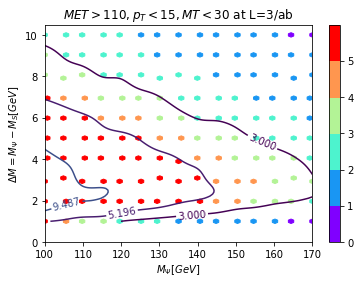

In [68]:
dh=pd.DataFrame()
#Significance=Signif
for i in range(LaL.shape[0]):
    for j in range(MH0170.shape[0]):
        dh=dh.append({'LaL':LaL[i],'MH0':MH0170[j],'XS':XS170[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)

xlist=np.linspace(100,170,15)
ylist=np.linspace(1,10,10)
X,Y = np.meshgrid(xlist,ylist)
#lumiscale=1.732
lumiscale=5.477
#lumiscale=1.0
Z=lumiscale*SignifT

#----------------------------------
X3=scipy.ndimage.zoom(X, 10)
Y3=scipy.ndimage.zoom(Y, 10)
Z3=scipy.ndimage.zoom(Z, 10)

#levels = [1.0, 2.0, 3.0, 4.0, 5.0,10.,20.]
levels = [3, 5.196152422706632, 9.4868329805051381, 16.431676725154983,30]

#levels = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
#cp=plt.contour(X,Y,Z,levels)
cp=plt.contour(X3,Y3,Z3,levels)
plt.clabel(cp,inline=True)

N=6
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')
plt.hexbin(dh.MH0,dh.LaL,(5.477*dh.Significance),gridsize=50,cmap=cmap)
plt.ylim(0,10.5)
plt.title("$MET>110, p_T<15, MT<30$ at L=3/ab ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar(ticks=range(N))
plt.clim(0., N ) 
#plt.savefig("significance1530.pdf")
plt.savefig("significance110.1530.pdf")


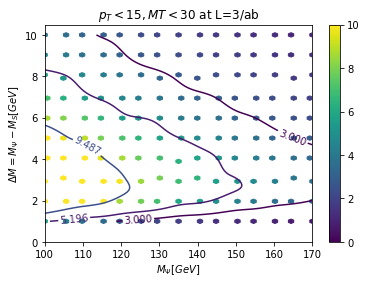

In [49]:
import scipy.ndimage

xlist=np.linspace(100,170,15)
ylist=np.linspace(1,10,10)
X,Y = np.meshgrid(xlist,ylist)
#lumiscale=1.732
lumiscale=5.477
#lumiscale=1.0
Z=lumiscale*SignifT

#------------from JoeKington-------
#data = np.loadtxt('data.txt')
# Resample your data grid by a factor of 3 using cubic spline interpolation.
#data = scipy.ndimage.zoom(data, 3)
#plt.contour(data)
#----------------------------------
X3=scipy.ndimage.zoom(X, 10)
Y3=scipy.ndimage.zoom(Y, 10)
Z3=scipy.ndimage.zoom(Z, 10)

levels = [3, 5.196152422706632, 9.4868329805051381, 16.431676725154983,30]
cp=plt.contour(X3,Y3,Z3,levels)
plt.clabel(cp,inline=True)


N=6
#cmap=discrete_cmap(N, 'jet')
#cmap=discrete_cmap(N, 'rainbow')
plt.hexbin(dh.MH0,dh.LaL,(5.477*dh.Significance),gridsize=50)
plt.ylim(0,10.5)
plt.title("$p_T<15, MT<30$ at L=3/ab ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

#plt.colorbar(ticks=range(N))
plt.colorbar()
plt.clim(0., 10 )

#plt.savefig("significance1530.pdf")

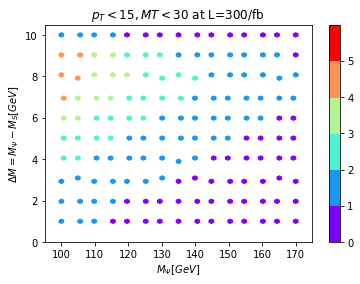

In [117]:
        
N=6
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')
plt.hexbin(dh.MH0,11-dh.LaL,(1.732*dh.Significance),gridsize=50,cmap=cmap)
plt.ylim(0,10.5)
plt.xlim(95,175)
plt.title("$p_T<15, MT<30$ at L=300/fb ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar(ticks=range(N))
plt.clim(0., N )
#ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

In [120]:
## scenario 153060: (muonpt_max, mt_max, ljpt_min)
Signif=fliplr(np.array(signiflist))
nsignal=fliplr(np.array(nsignallist))
Nsevents=1.E5
Eff=nsignal/Nsevents       ### !not in % 

In [121]:
LaL=deltaM
MH0=MF


In [122]:
dh=pd.DataFrame()
#Significance=Signif
for i in range(LaL.shape[0]):
    for j in range(MH0.shape[0]):
        dh=dh.append({'LaL':LaL[i],'MH0':MH0[j],'XS':XS[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)
 

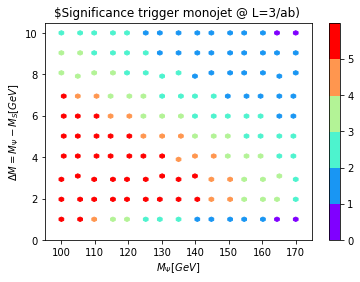

In [123]:
## .... (muonpt_max, mt_max, ljpt_min) =

#MF100_170=np.array([100,105,110,115,120,125,130,135,140,145,150,155,160,165,170])   #m=mF=11
#MH0tmp=MF100_170
#XSFt=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150,XS155,XS160,XS165,XS170])
#XStmp=np.array([XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt])

#Signiflist=[ [ 0.426421, 0.498034, 0.632711, 0.958815, 1.28211, 1.79472, 2.42329, 3.35564, 3.81283, 1.53733 ], [ 0.388295, 0.493624, 0.657272, 0.859351, 1.17363, 1.55714, 2.22001, 3.05382, 3.3078, 1.32856 ], [ 0.357779, 0.420974, 0.565365, 0.725008, 1.03861, 1.47417, 1.95841, 2.00598, 2.86082, 1.04942 ], [ 0.325049, 0.410565, 0.533693, 0.655197, 0.927015, 1.2752, 1.82748, 2.37553, 2.62385, 0.920751 ], [ 0.292484, 0.366585, 0.455754, 0.588082, 0.817619, 1.1578, 1.6526, 2.17853, 2.25076, 0.812824 ], [ 0.25645, 0.32761, 0.447574, 0.55363, 0.758393, 1.07066, 1.42161, 1.87526, 2.00593, 0.686141 ], [ 0.226393, 0.28549, 0.404179, 0.532921, 0.729642, 0.978795, 1.35608, 1.74766, 1.78525, 0.572809 ], [ 0.221634, 0.26934, 0.348202, 0.461024, 0.617198, 0.853414, 1.19676, 1.53075, 1.52981, 0.488396 ], [ 0.196884, 0.250173, 0.320231, 0.420881, 0.577653, 0.804688, 1.12732, 1.47798, 1.42451, 0.448553 ], [ 0.177239, 0.249151, 0.297081, 0.419491, 0.548579, 0.737799, 0.997854, 1.25654, 1.27259, 0.375325 ], [ 0.163719, 0.216034, 0.26197, 0.339071, 0.497226, 0.675712, 0.877162, 1.16001, 1.12492, 0.333037 ] ]

Signif=fliplr(np.array(Signiflist))
nsignal=fliplr(np.array(nsignallist))

Nsevents=1.E5
Eff=nsignal/Nsevents

dh=pd.DataFrame()
for i in range(LaL.shape[0]):
    for j in range(MH0170.shape[0]):
        dh=dh.append({'LaL':LaL[i],'MH0':MH0170[j],'XS':XS170[i,j],'Significance':Signif.transpose()[i,j]},ignore_index=True)


        #-------------------------------------------
        
N=6
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')
plt.hexbin(dh.MH0,dh.LaL,(5.477*dh.Significance),gridsize=50,cmap=cmap)
plt.ylim(0,10.5)
plt.xlim(95,175)
plt.title("$Significance trigger monojet @ L=3/ab) ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")

plt.colorbar(ticks=range(N))
plt.clim(0., N )
#ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
plt.savefig('significancemonojet.pdf')

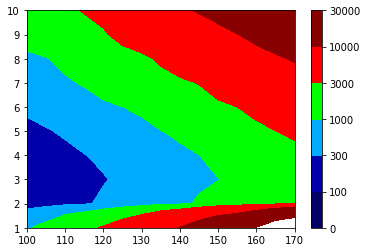

In [275]:
Z=LumiS3

#----------------------------------
X3=scipy.ndimage.zoom(X, 1)
Y3=scipy.ndimage.zoom(Y, 1)
Z3=scipy.ndimage.zoom(Z, 1)

levels = [0.0, 100, 300.0, 1000.0, 3000.0, 10000.0,30000.]
c=('#000066', '#0000aa','#00aaff','#00ff00','#ff0000','#880000')
#contour_filled = plt.contourf(X, Y, Z, levels, colors=c)
contour_filled = plt.contourf(X3, Y3, Z3, levels, colors=c)
plt.colorbar(contour_filled)
#plt.clabel(cp,inline=True)


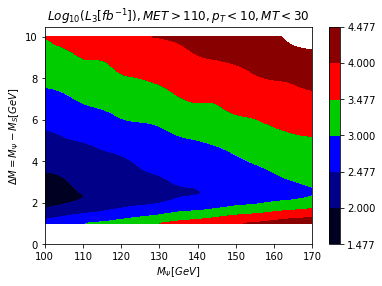

In [292]:
Z=np.log10(LumiS3)

#----------------------------------
X3=scipy.ndimage.zoom(X, 10)
Y3=scipy.ndimage.zoom(Y, 10)
Z3=scipy.ndimage.zoom(Z, 10)

levels = [1.47712, 2., 2.47712, 3.0, 3.47712, 4.0,4.47712]
c=('#000022','#000088', '#0000ff','#00cc00','#ff0000','#880000')
#contour_filled = plt.contourf(X, Y, Z, levels, colors=c)
contour_filled = plt.contourf(X3, Y3, Z3, levels, colors=c)
plt.colorbar(contour_filled)
#plt.clabel(cp,inline=True)
plt.ylim(0,10.5)
plt.title("$Log_{10}(L_3[fb^{-1}]), MET>110, p_T<10, MT<30$ ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")
#plt.savefig("log10lumiforS3.pdf")

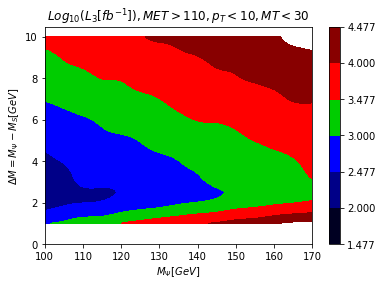

In [69]:
Z=np.log10(LumiS3)

#----------------------------------
X3=scipy.ndimage.zoom(X, 10)
Y3=scipy.ndimage.zoom(Y, 10)
Z3=scipy.ndimage.zoom(Z, 10)

levels = [1.47712, 2., 2.47712, 3.0, 3.47712, 4.0,4.47712]
c=('#000022','#000088', '#0000ff','#00cc00','#ff0000','#880000')
#contour_filled = plt.contourf(X, Y, Z, levels, colors=c)
contour_filled = plt.contourf(X3, Y3, Z3, levels, colors=c)
plt.colorbar(contour_filled)
#plt.clabel(cp,inline=True)
plt.ylim(0,10.5)
plt.title("$Log_{10}(L_3[fb^{-1}]), MET>110, p_T<10, MT<30$ ")
plt.xlabel("$M_\Psi [GeV]$")
plt.ylabel("$\Delta M = M_\Psi - M_S [GeV]$")
#plt.savefig("log10lumiforS3.pdf")

In [271]:
np.log10(3.)

0.47712125471966244